<a href="https://colab.research.google.com/github/loftyiceberg/Pyspark-Capstone-Project/blob/Nikhita/MachineLearning_DeepLearning_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("unicef_country_wise_avg.csv", encoding='ISO-8859-1')

In [ ]:
df.isnull().sum()

Geographic_Area                                                0
 BMI-for-age (Standard Deviation)                             60
 BMI-for-age <-1 SD                                           62
 BMI-for-age <-1 SD and â¥ -2 SD, Survey Estimates           73
 BMI-for-age <-2 SD                                           58
                                                            ... 
 Weight-for-height >+2 SD (overweight), Modeled Estimates     47
 Weight-for-height >+2 SD and â¤+3 SD, Survey Estimates      73
 Weight-for-height >+2SD but height-for-age â¥-2SD           72
 Weight-for-height >+3 SD                                     55
 Zero vegetable or fruit consumption (6-23months)            107
Length: 98, dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df.isnull().sum()

Geographic_Area                                              0
 BMI-for-age (Standard Deviation)                            0
 BMI-for-age <-1 SD                                          0
 BMI-for-age <-1 SD and â¥ -2 SD, Survey Estimates          0
 BMI-for-age <-2 SD                                          0
                                                            ..
 Weight-for-height >+2 SD (overweight), Modeled Estimates    0
 Weight-for-height >+2 SD and â¤+3 SD, Survey Estimates     0
 Weight-for-height >+2SD but height-for-age â¥-2SD          0
 Weight-for-height >+3 SD                                    0
 Zero vegetable or fruit consumption (6-23months)            0
Length: 98, dtype: int64

In [ ]:
df.head()

,Geographic_Area,BMI-for-age (Standard Deviation),BMI-for-age <-1 SD,"BMI-for-age <-1 SD and â¥ -2 SD, Survey Estimates",BMI-for-age <-2 SD,"BMI-for-age <-2 SD and â¥ -3 SD, Survey Estimates",BMI-for-age <-3 SD,BMI-for-age >+1 SD,"BMI-for-age >+1 SD and â¤+2 SD, Survey Estimates",BMI-for-age >+2 SD,...,Weight-for-height <-3 SD (severe wasting),Weight-for-height >+1 SD,"Weight-for-height >+1 SD and â¤+2 SD, Survey Estimates","Weight-for-height >+2 SD (Overweight) Modeled Estimates, Numbers Affected",Weight-for-height >+2 SD (overweight),"Weight-for-height >+2 SD (overweight), Modeled Estimates","Weight-for-height >+2 SD and â¤+3 SD, Survey Estimates",Weight-for-height >+2SD but height-for-age â¥-2SD,Weight-for-height >+3 SD,Zero vegetable or fruit consumption (6-23months)
0,Afghanistan,1.377778,19.550000,12.750000,6.933333,4.050000,2.866667,19.233333,13.750000,5.900000,...,2.928571,14.800000,11.033333,251.769565,4.830000,4.778261,3.150000,1.850000,1.611111,58.566667
1,Albania,1.755556,13.477778,6.666667,6.811111,3.177778,3.644444,44.566667,22.311111,22.266667,...,3.388889,43.655556,22.177778,37.617391,21.488889,19.721739,12.388889,12.666667,9.111111,24.766667
2,Algeria,1.538095,14.214286,7.583333,5.904762,2.816667,2.757143,36.271429,22.877778,14.352381,...,2.533333,34.476190,22.538889,523.278261,12.852381,13.465217,8.672222,8.083333,4.219048,26.000000
3,Andorra,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Angola,1.200000,18.333333,13.566667,4.750000,3.433333,1.300000,17.950000,14.183333,3.766667,...,1.900000,13.683333,11.133333,148.530435,2.550000,3.221739,2.033333,1.400000,0.516667,36.400000


In [ ]:
df.columns

Index(['Geographic_Area', ' BMI-for-age (Standard Deviation)',
       ' BMI-for-age <-1 SD',
       ' BMI-for-age <-1 SD and â¥ -2 SD, Survey Estimates',
       ' BMI-for-age <-2 SD',
       ' BMI-for-age <-2 SD and â¥ -3 SD, Survey Estimates',
       ' BMI-for-age <-3 SD', ' BMI-for-age >+1 SD',
       ' BMI-for-age >+1 SD and â¤+2 SD, Survey Estimates',
       ' BMI-for-age >+2 SD',
       ' BMI-for-age >+2 SD and â¤+3 SD, Survey Estimates',
       ' BMI-for-age >+3 SD', ' Continued breastfeeding (12-15 months)',
       ' Continued breastfeeding (12-23 months)',
       ' Continued breastfeeding (20-23 months)',
       ' Early initiation of breastfeeding',
       ' Egg and/or flesh foods consumption (6-23months)',
       ' Ever breastfed (0-23 months)',
       ' Exclusive breastfeeding (0-5 months)',
       ' Exclusively Breastfed for the First Two Days After Birth',
       ' Food group- Breastmilk (6-23months)',
       ' Food group- Dairy (milk, infant formula, yogurt, cheese) (6

In [ ]:
df= df.drop(columns=[' Prevalence of overweight among children aged 10-19 years, BMI > +1 standard deviations above the median (Crude estimate)',
       ' Prevalence of thinness among children aged 10-19 years, BMI < -2 standard deviations below the median (Crude estimate)',])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_features = [' BMI-for-age (Standard Deviation)',
       ' BMI-for-age <-1 SD',
       ' BMI-for-age <-1 SD and â¥ -2 SD, Survey Estimates',
       ' BMI-for-age <-2 SD',
       ' BMI-for-age <-2 SD and â¥ -3 SD, Survey Estimates',
       ' BMI-for-age <-3 SD', ' BMI-for-age >+1 SD',
       ' BMI-for-age >+1 SD and â¤+2 SD, Survey Estimates',
       ' BMI-for-age >+2 SD',
       ' BMI-for-age >+2 SD and â¤+3 SD, Survey Estimates',
       ' BMI-for-age >+3 SD', ' Continued breastfeeding (12-15 months)',
       ' Continued breastfeeding (12-23 months)',
       ' Continued breastfeeding (20-23 months)',
       ' Early initiation of breastfeeding',
       ' Egg and/or flesh foods consumption (6-23months)',
       ' Ever breastfed (0-23 months)',
       ' Exclusive breastfeeding (0-5 months)',
       ' Exclusively Breastfed for the First Two Days After Birth',
       ' Food group- Breastmilk (6-23months)',
       ' Food group- Dairy (milk, infant formula, yogurt, cheese) (6-23months)',
       ' Food group- Eggs (6-23months)',
       ' Food group- Flesh foods (meat, poultry, fish and organ meats) (6-23months)',
       ' Food group- Grains, roots, tubers and plantains (6-23months)',
       ' Food group- Other fruits and vegetables (6-23months)',
       ' Food group- Pulses (beans, peas, lentils), nuts and seeds (6-23months)',
       ' Food group- Vitamin-A rich fruits and vegetables (6-23months)',
       ' Height-for-age (Standard Deviation)', ' Height-for-age <-1 SD',
       ' Height-for-age <-1 SD and â¥ -2 SD (Mild Stunting only), Survey Estimates',
       ' Height-for-age <-2 SD (Stunting) Modeled Estimates, Numbers Affected',
       ' Height-for-age <-2 SD (stunting)',
       ' Height-for-age <-2 SD (stunting), Modeled Estimates',
       ' Height-for-age <-2 SD and â¥ -3 SD (Moderate Stunting only), Survey Estimates',
       ' Height-for-age <-2SD & Weight-for-height <-2SD',
       ' Height-for-age <-2SD & Weight-for-height >+2SD',
       ' Height-for-age <-2SD but weight-for-height â¥-2SD and weight-for-height â¤2SD',
       ' Height-for-age <-3 SD (Severe Stunting)',
       ' Height-for-age <-3SD & Weight-for-height <-2SD',
       ' Height-for-age <-3SD & Weight-for-height >+2SD',
       ' Height-for-age >+1 SD',
       ' Height-for-age >+1 SD and â¤+2 SD, Survey Estimates',
       ' Height-for-age >+2 SD',
       ' Height-for-age >+2 SD and â¤+3 SD, Survey Estimates',
       ' Height-for-age >+3 SD',
       ' Introduction to solid, semi-solid foods (6-8 months)',
       ' Iodized salt consumption (>0 ppm) among all tested households',
       ' Iodized salt consumption (>0 ppm) among all tested households with salt',
       ' Mean BMI-for-age', ' Mean Height-for-age', ' Mean Weight-for-height',
       ' Minimum acceptable diet (children aged 6-23 months)',
       ' Minimum diet diversity (children aged 6 to 23 months)',
       ' Minimum meal frequency (children aged 6 to 23 months)',
       ' Mixed Milk Feeding (0-5 months)', ' No Wasting, Overweight, Stunting',
       ' Overweight',
       ' Percentage of births without a birth weight in the data source',
       ' Predominantly breastfeeding (children aged 0 to 5 months)',
       ' Prevalence of low birth weight among new-borns',
       ' Thinness', ' VAS Semester 1 Coverage', ' VAS Semester 2 Coverage',
       ' Vitamin A two-dose coverage', ' Wasted, Overweight or Stunted',
       ' Weight-for-age (>+2 SD)', ' Weight-for-age (>+3 SD)',
       ' Weight-for-age (Mean)', ' Weight-for-age (Standard Deviation)',
       ' Weight-for-age <-1 SD',
       ' Weight-for-age <-1 SD and â¥ -2 SD, Survey Estimates',
       ' Weight-for-age <-2 SD (Underweight)',
       ' Weight-for-age <-2 SD and â¥ -3 SD, Survey Estimates',
       ' Weight-for-age <-2SD & Weight-for-height <-2SD',
       ' Weight-for-age <-3 SD (Severe Underweight)',
       ' Weight-for-age <-3SD & Weight-for-height <-2SD',
       ' Weight-for-age >+1 SD',
       ' Weight-for-age >+1 SD and â¤+2 SD, Survey Estimates',
       ' Weight-for-age >+2 SD and â¤+3 SD, Survey Estimates',
       ' Weight-for-height (Standard Deviation)', ' Weight-for-height <-1 SD',
       ' Weight-for-height <-1 SD and â¥ -2 SD, Survey Estimates',
       ' Weight-for-height <-2 SD (wasting)',
       ' Weight-for-height <-2 SD and â¥ -3 SD, Survey Estimates',
       ' Weight-for-height <-2SD but height-for-age â¥-2SD',
       ' Weight-for-height <-3 SD (severe wasting)',
       ' Weight-for-height >+1 SD',
       ' Weight-for-height >+1 SD and â¤+2 SD, Survey Estimates',
       ' Weight-for-height >+2 SD (Overweight) Modeled Estimates, Numbers Affected',
       ' Weight-for-height >+2 SD (overweight)',
       ' Weight-for-height >+2 SD (overweight), Modeled Estimates',
       ' Weight-for-height >+2 SD and â¤+3 SD, Survey Estimates',
       ' Weight-for-height >+2SD but height-for-age â¥-2SD',
       ' Weight-for-height >+3 SD',
       ' Zero vegetable or fruit consumption (6-23months)']

df[numeric_features] = scaler.fit_transform(df[numeric_features])

# One-hot encoding categorical features

categorical_features = ['Geographic_Area']
df = pd.get_dummies(df, columns=categorical_features)


In [ ]:

X = df.drop(columns=[ ' Weight-for-age <-2 SD (Underweight)',
                      ' Weight-for-age <-3 SD (Severe Underweight)',
                      ' Weight-for-height <-2 SD (wasting)',
                      ' Weight-for-height <-3 SD (severe wasting)',
                      ' Weight-for-height >+2 SD (overweight)',
                      ' Weight-for-height >+3 SD',
                      ' Height-for-age <-2 SD (stunting)',
                      ' Height-for-age <-3 SD (Severe Stunting)',
                      ' Iodized salt consumption (>0 ppm) among all tested households',
                      ' Iodized salt consumption (>0 ppm) among all tested households with salt',
                      ' Mean BMI-for-age',
                      ' Mean Height-for-age',
                      ' Mean Weight-for-height',
                      ' No Wasting, Overweight, Stunting',
                      ' Thinness',
                      ' VAS Semester 1 Coverage',
                      ' VAS Semester 2 Coverage',
                      ' Vitamin A two-dose coverage',
                      ' Wasted, Overweight or Stunted' ] )

In [ ]:
y = df[[              ' Weight-for-age <-2 SD (Underweight)',
                      ' Weight-for-age <-3 SD (Severe Underweight)',
                      ' Weight-for-height <-2 SD (wasting)',
                      ' Weight-for-height <-3 SD (severe wasting)',
                      ' Weight-for-height >+2 SD (overweight)',
                      ' Weight-for-height >+3 SD',
                      ' Height-for-age <-2 SD (stunting)',
                      ' Height-for-age <-3 SD (Severe Stunting)',
                      ' Iodized salt consumption (>0 ppm) among all tested households',
                      ' Iodized salt consumption (>0 ppm) among all tested households with salt',
                      ' Mean BMI-for-age',
                      ' Mean Height-for-age',
                      ' Mean Weight-for-height',
                      ' No Wasting, Overweight, Stunting',
                      ' Thinness',
                      ' VAS Semester 1 Coverage',
                      ' VAS Semester 2 Coverage',
                      ' Vitamin A two-dose coverage',
                      ' Wasted, Overweight or Stunted'   ]]

# Feature Engineering and Selection

In [ ]:
from sklearn.linear_model import Lasso, Ridge

# Lasso regression for feature selection
lasso = Lasso(alpha=0.4)  # Adjust the alpha parameter as needed
lasso.fit(X, y)
lasso_feature_importance = lasso.coef_

# Ridge regression for feature selection
ridge = Ridge(alpha=0.4)  # Adjust the alpha parameter as needed
ridge.fit(X, y)
ridge_feature_importance = ridge.coef_

In [ ]:
lasso_feature_importance

array([[ 0.,  0.,  0., ...,  0.,  0., -0.],
       [ 0.,  0.,  0., ...,  0.,  0., -0.],
       [ 0.,  0.,  0., ...,  0.,  0., -0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., -0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [ ]:
ridge_feature_importance

array([[-5.83374013e-02, -3.67854980e-02,  3.23373791e-02, ...,
         1.70742299e-01,  4.57852247e-03, -2.21586609e-02],
       [-8.73624910e-02, -1.33060898e-01, -1.99840988e-02, ...,
         9.91283119e-02, -5.92725535e-02, -1.83965280e-02],
       [-1.20766940e-01,  9.54368730e-02, -4.75603815e-02, ...,
         3.62496201e-02,  9.68809025e-02,  2.22340194e-02],
       ...,
       [ 7.49434851e-02, -2.69749035e-01, -8.59750789e-03, ...,
        -4.88060244e-01,  5.20611536e-01, -4.24422059e-02],
       [ 8.32644633e-02, -2.58508942e-01,  2.04001155e-02, ...,
        -1.02127272e+00,  8.35130018e-01,  7.69004629e-03],
       [-2.77859893e-02, -6.39690500e-02, -1.90990271e-02, ...,
        -1.89080350e-03, -7.59216925e-03,  6.25969751e-04]])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Calculate permutation feature importance
def permutation_importance(model, X_test, y_test):
    baseline = mean_squared_error(y_test, model.predict(X_test))
    permuted_scores = {}
    for feature in X_test.columns:
        X_permuted = X_test.copy()
        X_permuted[feature] = X_permuted[feature].sample(frac=1, random_state=42).values
        permuted_score = mean_squared_error(y_test, model.predict(X_permuted))
        permuted_scores[feature] = baseline - permuted_score
    return permuted_scores


In [ ]:
permutation_importance_scores = permutation_importance(rf_model, X_test, y_test)

In [ ]:
permutation_importance_scores

{' BMI-for-age (Standard Deviation)': -0.0009017972739328306,
 ' BMI-for-age <-1 SD': -0.002382572926499682,
 ' BMI-for-age <-1 SD and â\x89¥ -2 SD, Survey Estimates': -0.0011676765525937272,
 ' BMI-for-age <-2 SD': -0.00130335528840278,
 ' BMI-for-age <-2 SD and â\x89¥ -3 SD, Survey Estimates': -0.002072461199404102,
 ' BMI-for-age <-3 SD': -0.002923827026457465,
 ' BMI-for-age >+1 SD': -0.0016234548847794406,
 ' BMI-for-age >+1 SD and â\x89¤+2 SD, Survey Estimates': -0.0002827053266765689,
 ' BMI-for-age >+2 SD': -0.00576944602903362,
 ' BMI-for-age >+2 SD and â\x89¤+3 SD, Survey Estimates': -0.0009274582176242996,
 ' BMI-for-age >+3 SD': -0.0009355030390351682,
 ' Continued breastfeeding (12-15 months)': -0.002090032934361663,
 ' Continued breastfeeding (12-23 months)': -0.0005358095478497082,
 ' Continued breastfeeding (20-23 months)': -0.0008185138109951806,
 ' Early initiation of breastfeeding': -0.0013884500031640379,
 ' Egg and/or flesh foods consumption (6-23months)': 0.000179

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Train a decision tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Get feature importances from the decision tree model
decision_tree_feature_importance = dt_model.feature_importances_

In [ ]:
decision_tree_feature_importance

array([5.62308455e-03, 1.07098182e-03, 0.00000000e+00, 1.01106014e-02,
       1.10008637e-04, 1.04490533e-03, 1.40517846e-02, 9.01525305e-04,
       1.00237940e-02, 1.26545664e-02, 3.51092232e-03, 3.04927735e-03,
       3.99219341e-04, 0.00000000e+00, 0.00000000e+00, 4.85269579e-04,
       6.60158326e-03, 0.00000000e+00, 6.69815091e-04, 5.20759393e-03,
       4.43356419e-03, 8.30727684e-04, 0.00000000e+00, 3.60488403e-04,
       0.00000000e+00, 0.00000000e+00, 3.67459941e-03, 0.00000000e+00,
       3.52681832e-02, 0.00000000e+00, 6.24195933e-04, 2.09156169e-02,
       5.01056678e-04, 4.44820709e-01, 1.48041688e-01, 2.70137293e-03,
       2.23880606e-03, 3.76996496e-02, 3.44110922e-03, 2.93295441e-03,
       1.63743469e-03, 8.34724280e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.21769541e-02, 0.00000000e+00, 1.11122390e-03,
       1.05109196e-03, 3.03840357e-03, 1.77801376e-02, 2.00222262e-03,
       4.53591495e-03, 1.27616036e-03, 5.10680440e-02, 3.12663394e-03,
      

In [ ]:
# Define your chosen significance threshold
threshold = 0.001  # You can adjust this based on your preference

# Create a dictionary of feature importance scores
feature_importance_scores = {
    ' BMI-for-age (Standard Deviation)': -0.0009017972739328306,
 ' BMI-for-age <-1 SD': -0.002382572926499682,
 ' BMI-for-age <-1 SD and â\x89¥ -2 SD, Survey Estimates': -0.0011676765525937272,
 ' BMI-for-age <-2 SD': -0.00130335528840278,
 ' BMI-for-age <-2 SD and â\x89¥ -3 SD, Survey Estimates': -0.002072461199404102,
 ' BMI-for-age <-3 SD': -0.002923827026457465,
 ' BMI-for-age >+1 SD': -0.0016234548847794406,
 ' BMI-for-age >+1 SD and â\x89¤+2 SD, Survey Estimates': -0.0002827053266765689,
 ' BMI-for-age >+2 SD': -0.00576944602903362,
 ' BMI-for-age >+2 SD and â\x89¤+3 SD, Survey Estimates': -0.0009274582176242996,
 ' BMI-for-age >+3 SD': -0.0009355030390351682,
 ' Continued breastfeeding (12-15 months)': -0.002090032934361663,
 ' Continued breastfeeding (12-23 months)': -0.0005358095478497082,
 ' Continued breastfeeding (20-23 months)': -0.0008185138109951806,
 ' Early initiation of breastfeeding': -0.0013884500031640379,
 ' Egg and/or flesh foods consumption (6-23months)': 0.00017967443826877316,
 ' Ever breastfed (0-23 months)': -0.0015243099346849698,
 ' Exclusive breastfeeding (0-5 months)': -0.0028368373363185373,
 ' Exclusively Breastfed for the First Two Days After Birth': -0.0005969467880767854,
 ' Food group- Breastmilk (6-23months)': -9.664943237883139e-05,
 ' Food group- Dairy (milk, infant formula, yogurt, cheese) (6-23months)': -0.00030538138328972675,
 ' Food group- Eggs (6-23months)': 5.9883395150006624e-05,
 ' Food group- Flesh foods (meat, poultry, fish and organ meats) (6-23months)': -0.0001864208701337633,
 ' Food group- Grains, roots, tubers and plantains (6-23months)': 9.734522024287817e-05,
 ' Food group- Other fruits and vegetables (6-23months)': 0.0004900294165114394,
 ' Food group- Pulses (beans, peas, lentils), nuts and seeds (6-23months)': 0.0001091701261864142,
 ' Food group- Vitamin-A rich fruits and vegetables (6-23months)': -6.146672098894523e-05,
 ' Height-for-age (Standard Deviation)': -0.003723947010038836,
 ' Height-for-age <-1 SD': -0.004270868126390492,
 ' Height-for-age <-1 SD and â\x89¥ -2 SD (Mild Stunting only), Survey Estimates': -0.001616706864026568,
 ' Height-for-age <-2 SD (Stunting) Modeled Estimates, Numbers Affected': -0.000700366768546401,
 ' Height-for-age <-2 SD (stunting), Modeled Estimates': -0.03201407237984827,
 ' Height-for-age <-2 SD and â\x89¥ -3 SD (Moderate Stunting only), Survey Estimates': -0.003392347637546478,
 ' Height-for-age <-2SD & Weight-for-height <-2SD': -0.17045285822008133,
 ' Height-for-age <-2SD & Weight-for-height >+2SD': -0.011318626813080296,
 ' Height-for-age <-2SD but weight-for-height â\x89¥-2SD and weight-for-height â\x89¤2SD': -0.01009442964342211,
 ' Height-for-age <-3SD & Weight-for-height <-2SD': -0.004120757820182425,
 ' Height-for-age <-3SD & Weight-for-height >+2SD': -0.006374445441018672,
 ' Height-for-age >+1 SD': -4.978720413365001e-05,
 ' Height-for-age >+1 SD and â\x89¤+2 SD, Survey Estimates': -0.00034026804691036916,
 ' Height-for-age >+2 SD': -0.00023925103124394775,
 ' Height-for-age >+2 SD and â\x89¤+3 SD, Survey Estimates': -0.00045898660752807796,
 ' Height-for-age >+3 SD': -0.0006280900963033798,
 ' Introduction to solid, semi-solid foods (6-8 months)': 8.58515288199857e-05,
 ' Minimum acceptable diet (children aged 6-23 months)': -7.762870358021812e-05,
 ' Minimum diet diversity (children aged 6 to 23 months)': -0.0003116284456230467,
 ' Minimum meal frequency (children aged 6 to 23 months)': 0.001139556200189601,
 ' Mixed Milk Feeding (0-5 months)': 0.0010811694959675933,
 ' Overweight': -0.0038804300371547695,
 ' Percentage of births without a birth weight in the data source': -0.0004958102734433922,
 ' Predominantly breastfeeding (children aged 0 to 5 months)': -0.0015648815591385867,
 ' Prevalence of low birth weight among new-borns': -0.000870610346731665,
 ' Weight-for-age (>+2 SD)': -0.00014835200996371478,
 ' Weight-for-age (>+3 SD)': -0.00016524949800036937,
 ' Weight-for-age (Mean)': -0.04136244478969975,
 ' Weight-for-age (Standard Deviation)': -0.021615962510926706,
 ' Weight-for-age <-1 SD': -0.06402291968164803,
 ' Weight-for-age <-1 SD and â\x89¥ -2 SD, Survey Estimates': -0.0014388121375066287,
 ' Weight-for-age <-2 SD and â\x89¥ -3 SD, Survey Estimates': -0.0006480754176242942,
 ' Weight-for-age <-2SD & Weight-for-height <-2SD': -0.0008636954731000845,
 ' Weight-for-age <-3SD & Weight-for-height <-2SD': -0.0005247194809681333,
 ' Weight-for-age >+1 SD': -0.0014398257123789115,
 ' Weight-for-age >+1 SD and â\x89¤+2 SD, Survey Estimates': -0.0004191828000068287,
 ' Weight-for-age >+2 SD and â\x89¤+3 SD, Survey Estimates': -0.001180020053388936,
 ' Weight-for-height (Standard Deviation)': -0.007528840317579277,
 ' Weight-for-height <-1 SD': -0.002520225944270371,
 ' Weight-for-height <-1 SD and â\x89¥ -2 SD, Survey Estimates': -0.0020174298639374644,
 ' Weight-for-height <-2 SD and â\x89¥ -3 SD, Survey Estimates': -0.002817599610285243,
 ' Weight-for-height <-2SD but height-for-age â\x89¥-2SD': -0.007930781158087347,
 ' Weight-for-height >+1 SD': -0.0031099493602369244,
 ' Weight-for-height >+1 SD and â\x89¤+2 SD, Survey Estimates': -0.0007499555725946072,
 ' Weight-for-height >+2 SD (Overweight) Modeled Estimates, Numbers Affected': -0.0008079639730416699,
 ' Weight-for-height >+2 SD (overweight), Modeled Estimates': -0.021553327770677116,
 ' Weight-for-height >+2 SD and â\x89¤+3 SD, Survey Estimates': -0.0005682410696295215,
 ' Weight-for-height >+2SD but height-for-age â\x89¥-2SD': -0.003262607591365707,
 ' Zero vegetable or fruit consumption (6-23months)': -0.0006946963351462387,
}

# Filter features based on the threshold
important_features = [feature for feature, score in feature_importance_scores.items() if abs(score) >= threshold]

# Print the important features
print("Important Features:")
for feature in important_features:
    print(feature)


Important Features:
 BMI-for-age <-1 SD
 BMI-for-age <-1 SD and â¥ -2 SD, Survey Estimates
 BMI-for-age <-2 SD
 BMI-for-age <-2 SD and â¥ -3 SD, Survey Estimates
 BMI-for-age <-3 SD
 BMI-for-age >+1 SD
 BMI-for-age >+2 SD
 Continued breastfeeding (12-15 months)
 Early initiation of breastfeeding
 Ever breastfed (0-23 months)
 Exclusive breastfeeding (0-5 months)
 Height-for-age (Standard Deviation)
 Height-for-age <-1 SD
 Height-for-age <-1 SD and â¥ -2 SD (Mild Stunting only), Survey Estimates
 Height-for-age <-2 SD (stunting), Modeled Estimates
 Height-for-age <-2 SD and â¥ -3 SD (Moderate Stunting only), Survey Estimates
 Height-for-age <-2SD & Weight-for-height <-2SD
 Height-for-age <-2SD & Weight-for-height >+2SD
 Height-for-age <-2SD but weight-for-height â¥-2SD and weight-for-height â¤2SD
 Height-for-age <-3SD & Weight-for-height <-2SD
 Height-for-age <-3SD & Weight-for-height >+2SD
 Minimum meal frequency (children aged 6 to 23 months)
 Mixed Milk Feeding (0-5 months)
 Ov

In [ ]:
x= df[[ ' BMI-for-age <-1 SD',
        ' BMI-for-age <-1 SD and â¥ -2 SD, Survey Estimates',
        ' BMI-for-age <-2 SD',
        ' BMI-for-age <-2 SD and â¥ -3 SD, Survey Estimates',
        ' BMI-for-age <-3 SD',
        ' BMI-for-age >+1 SD',
        ' BMI-for-age >+2 SD',
        ' Continued breastfeeding (12-15 months)',
        ' Early initiation of breastfeeding',
        ' Ever breastfed (0-23 months)',
        ' Exclusive breastfeeding (0-5 months)',
        ' Height-for-age (Standard Deviation)',
        ' Height-for-age <-1 SD',
        ' Height-for-age <-1 SD and â¥ -2 SD (Mild Stunting only), Survey Estimates',
        ' Height-for-age <-2 SD (stunting), Modeled Estimates',
        ' Height-for-age <-2 SD and â¥ -3 SD (Moderate Stunting only), Survey Estimates',
        ' Height-for-age <-2SD & Weight-for-height <-2SD',
        ' Height-for-age <-2SD & Weight-for-height >+2SD',
        ' Height-for-age <-2SD but weight-for-height â¥-2SD and weight-for-height â¤2SD',
        ' Height-for-age <-3SD & Weight-for-height <-2SD',
        ' Height-for-age <-3SD & Weight-for-height >+2SD',
        ' Minimum meal frequency (children aged 6 to 23 months)',
        ' Mixed Milk Feeding (0-5 months)',
        ' Overweight',
        ' Predominantly breastfeeding (children aged 0 to 5 months)',
        ' Weight-for-age (Mean)',
        ' Weight-for-age (Standard Deviation)',
        ' Weight-for-age <-1 SD',
        ' Weight-for-age <-1 SD and â¥ -2 SD, Survey Estimates',
        ' Weight-for-age >+1 SD',
        ' Weight-for-age >+2 SD and â¤+3 SD, Survey Estimates',
        ' Weight-for-height (Standard Deviation)',
        ' Weight-for-height <-1 SD',
        ' Weight-for-height <-1 SD and â¥ -2 SD, Survey Estimates',
        ' Weight-for-height <-2 SD and â¥ -3 SD, Survey Estimates',
        ' Weight-for-height <-2SD but height-for-age â¥-2SD',
        ' Weight-for-height >+1 SD',
        ' Weight-for-height >+2 SD (overweight), Modeled Estimates',
        ' Weight-for-height >+2SD but height-for-age â¥-2SD']]

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 39 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0    BMI-for-age <-1 SD                                                               207 non-null    float64
 1    BMI-for-age <-1 SD and â¥ -2 SD, Survey Estimates                               207 non-null    float64
 2    BMI-for-age <-2 SD                                                               207 non-null    float64
 3    BMI-for-age <-2 SD and â¥ -3 SD, Survey Estimates                               207 non-null    float64
 4    BMI-for-age <-3 SD                                                               207 non-null    float64
 5    BMI-for-age >+1 SD                                                               207 non-null    float64
 6    B

In [ ]:
correlation_matrix = x.corr()

In [ ]:
# Set the correlation threshold
threshold = 0.9

# Create a mask for the upper triangle of the correlation matrix
mask = abs(correlation_matrix) > threshold


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.draw()
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:660: UserWarning: Glyph 137 (\x89) missing from current font.
  bboxes = [l.get_window_extent() for l in labels]
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


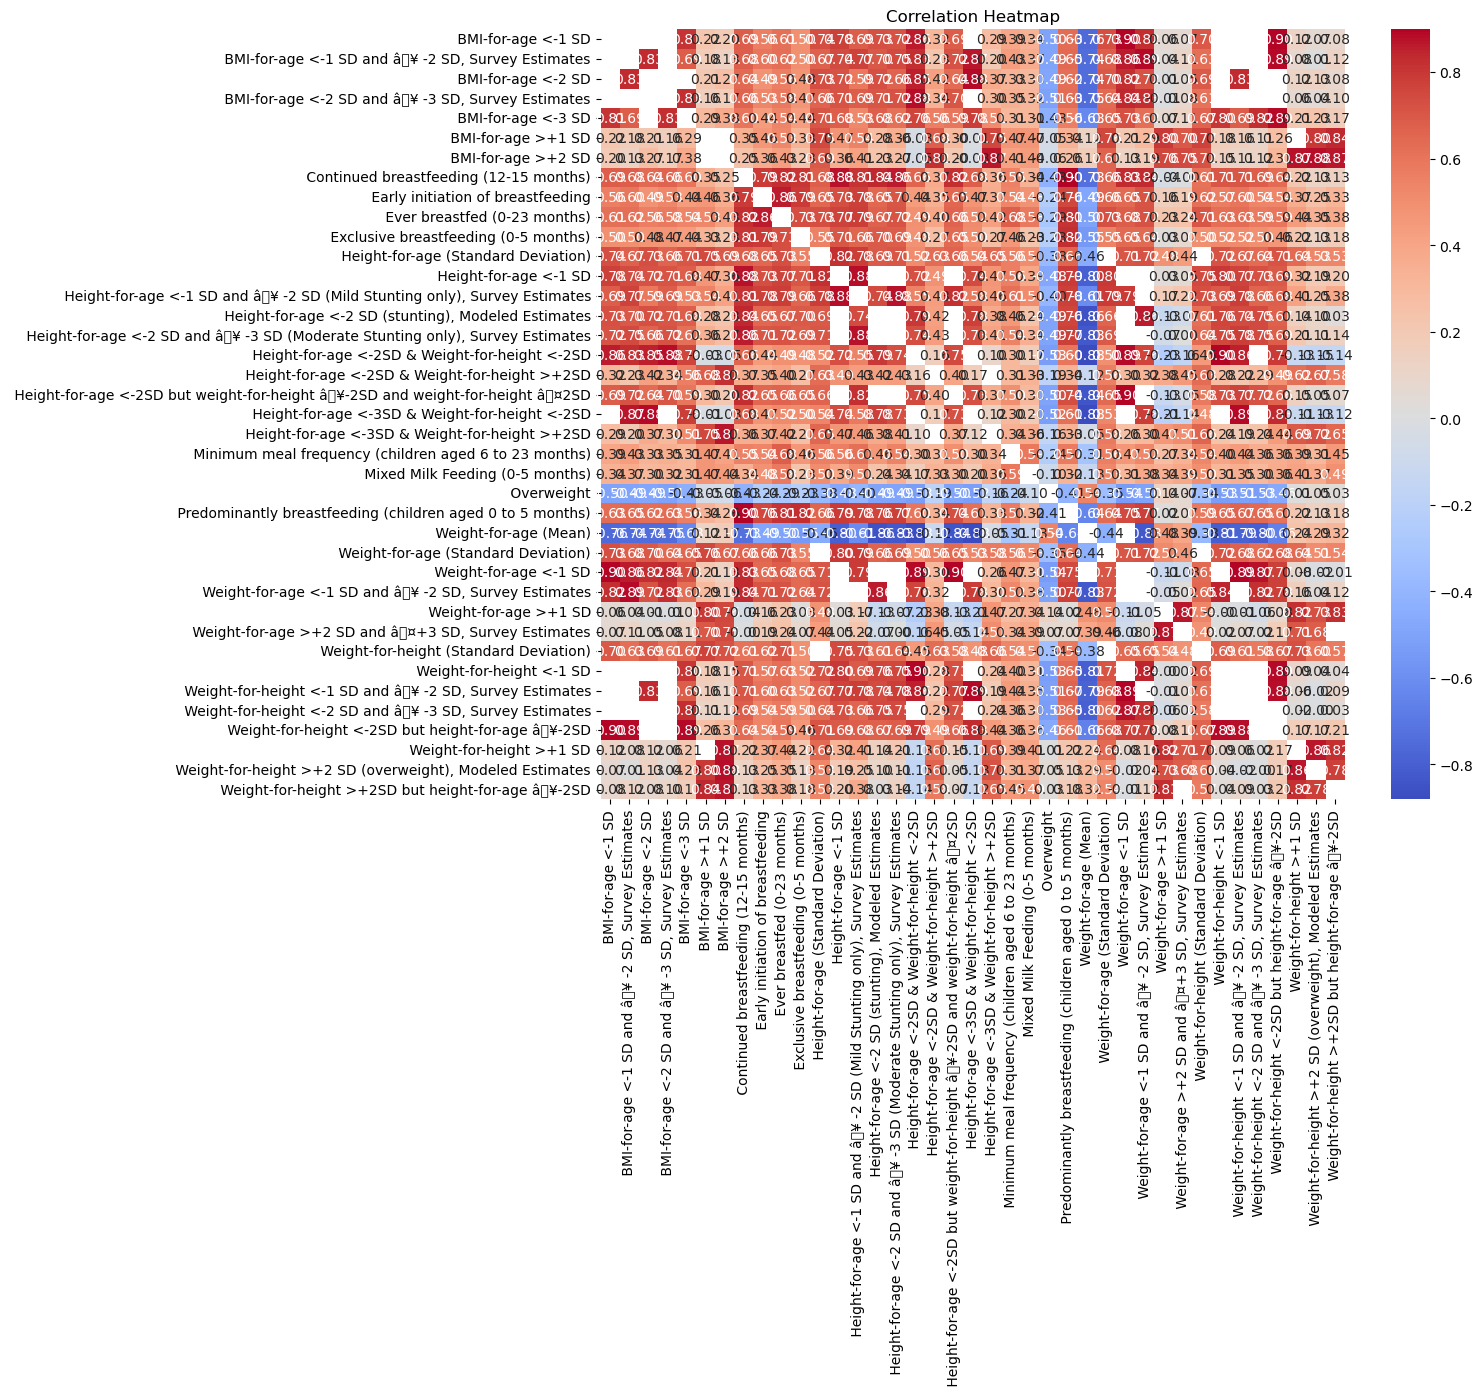

In [ ]:
# Create a heatmap to visualize correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", mask=mask, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
mask

,BMI-for-age <-1 SD,"BMI-for-age <-1 SD and â¥ -2 SD, Survey Estimates",BMI-for-age <-2 SD,"BMI-for-age <-2 SD and â¥ -3 SD, Survey Estimates",BMI-for-age <-3 SD,BMI-for-age >+1 SD,BMI-for-age >+2 SD,Continued breastfeeding (12-15 months),Early initiation of breastfeeding,Ever breastfed (0-23 months),...,Weight-for-age >+1 SD,"Weight-for-age >+2 SD and â¤+3 SD, Survey Estimates",Weight-for-height (Standard Deviation),Weight-for-height <-1 SD,"Weight-for-height <-1 SD and â¥ -2 SD, Survey Estimates","Weight-for-height <-2 SD and â¥ -3 SD, Survey Estimates",Weight-for-height <-2SD but height-for-age â¥-2SD,Weight-for-height >+1 SD,"Weight-for-height >+2 SD (overweight), Modeled Estimates",Weight-for-height >+2SD but height-for-age â¥-2SD
BMI-for-age <-1 SD,True,True,True,True,False,False,False,False,False,False,...,False,False,False,True,True,True,False,False,False,False
"BMI-for-age <-1 SD and â¥ -2 SD, Survey Estimates",True,True,False,True,False,False,False,False,False,False,...,False,False,False,True,True,True,False,False,False,False
BMI-for-age <-2 SD,True,False,True,True,True,False,False,False,False,False,...,False,False,False,True,False,True,True,False,False,False
"BMI-for-age <-2 SD and â¥ -3 SD, Survey Estimates",True,True,True,True,False,False,False,False,False,False,...,False,False,False,True,True,True,True,False,False,False
BMI-for-age <-3 SD,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
BMI-for-age >+1 SD,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
BMI-for-age >+2 SD,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Continued breastfeeding (12-15 months),False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Early initiation of breastfeeding,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Ever breastfed (0-23 months),False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Create an empty set to store the correlated columns
correlated_features = set()

# Iterate through the columns and find correlated features
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i, j] >= threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            correlated_features.add(colname_i)
            correlated_features.add(colname_j)

# Convert the set to a list for further analysis or removal
correlated_features_list = list(correlated_features)

# Now you have a list of correlated features
print("Correlated Features:", correlated_features_list)

Correlated Features: [' Weight-for-height (Standard Deviation)', ' BMI-for-age <-3 SD', ' Weight-for-height <-1 SD', ' Height-for-age <-1 SD', ' BMI-for-age <-1 SD and â\x89¥ -2 SD, Survey Estimates', ' Weight-for-height <-1 SD and â\x89¥ -2 SD, Survey Estimates', ' Weight-for-height >+2SD but height-for-age â\x89¥-2SD', ' Weight-for-height <-2 SD and â\x89¥ -3 SD, Survey Estimates', ' Height-for-age <-2SD & Weight-for-height <-2SD', ' BMI-for-age <-2 SD and â\x89¥ -3 SD, Survey Estimates', ' Weight-for-age <-1 SD', ' Height-for-age <-2 SD and â\x89¥ -3 SD (Moderate Stunting only), Survey Estimates', ' Height-for-age <-2SD but weight-for-height â\x89¥-2SD and weight-for-height â\x89¤2SD', ' Height-for-age <-3SD & Weight-for-height <-2SD', ' Height-for-age <-3SD & Weight-for-height >+2SD', ' BMI-for-age <-2 SD', ' Height-for-age <-2SD & Weight-for-height >+2SD', ' Weight-for-age (Standard Deviation)', ' Height-for-age <-2 SD (stunting), Modeled Estimates', ' Weight-for-height >+1 SD', '

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'data' is your DataFrame containing the correlated features
correlated_features = [' Weight-for-height (Standard Deviation)',
                       ' BMI-for-age <-3 SD',
                       ' Weight-for-height <-1 SD',
                       ' Height-for-age <-1 SD',
                       ' BMI-for-age <-1 SD and â\x89¥ -2 SD, Survey Estimates',
                       ' Weight-for-height <-1 SD and â\x89¥ -2 SD, Survey Estimates',
                       ' Weight-for-height >+2SD but height-for-age â\x89¥-2SD',
                       ' Weight-for-height <-2 SD and â\x89¥ -3 SD, Survey Estimates',
                       ' Height-for-age <-2SD & Weight-for-height <-2SD',
                       ' BMI-for-age <-2 SD and â\x89¥ -3 SD, Survey Estimates',
                       ' Weight-for-age <-1 SD',
                       ' Height-for-age <-2 SD and â\x89¥ -3 SD (Moderate Stunting only), Survey Estimates',
                       ' Height-for-age <-2SD but weight-for-height â\x89¥-2SD and weight-for-height â\x89¤2SD',
                       ' Height-for-age <-3SD & Weight-for-height <-2SD',
                       ' Height-for-age <-3SD & Weight-for-height >+2SD',
                       ' BMI-for-age <-2 SD',
                       ' Height-for-age <-2SD & Weight-for-height >+2SD',
                       ' Weight-for-age (Standard Deviation)',
                       ' Height-for-age <-2 SD (stunting), Modeled Estimates',
                       ' Weight-for-height >+1 SD',
                       ' Height-for-age <-1 SD and â\x89¥ -2 SD (Mild Stunting only), Survey Estimates',
                       ' Weight-for-height <-2SD but height-for-age â\x89¥-2SD',
                       ' Weight-for-age <-1 SD and â\x89¥ -2 SD, Survey Estimates',
                       ' BMI-for-age >+2 SD',
                       ' BMI-for-age <-1 SD',
                       ' BMI-for-age >+1 SD',
                       ' Height-for-age (Standard Deviation)',
                       ' Weight-for-age >+2 SD and â\x89¤+3 SD, Survey Estimates']

In [ ]:
# Extract the correlated features into a new DataFrame
correlated_df = x[correlated_features]


In [ ]:
correlated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 28 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0    Weight-for-height (Standard Deviation)                                           207 non-null    float64
 1    BMI-for-age <-3 SD                                                               207 non-null    float64
 2    Weight-for-height <-1 SD                                                         207 non-null    float64
 3    Height-for-age <-1 SD                                                            207 non-null    float64
 4    BMI-for-age <-1 SD and â¥ -2 SD, Survey Estimates                               207 non-null    float64
 5    Weight-for-height <-1 SD and â¥ -2 SD, Survey Estimates                         207 non-null    float64
 6    W

In [ ]:
# Calculate the VIF for each feature
vif = pd.DataFrame()
vif["Features"] = correlated_df.columns
vif["VIF"] = [variance_inflation_factor(correlated_df.values, i) for i in range(correlated_df.shape[1])]

In [ ]:
# Sort the features by VIF in ascending order (lower VIF indicates less multicollinearity)
vif.sort_values(by='VIF', ascending=True, inplace=True)

In [ ]:
# Set the threshold for VIF
vif_threshold = 5  # You can adjust this threshold as needed

# Select the features with VIF below the threshold
selected_features = vif[vif["VIF"] < vif_threshold]["Features"].values

In [ ]:
# Print the selected features
print("Selected Features with VIF below {}:".format(vif_threshold))
print(selected_features)

Selected Features with VIF below 5:
[]


### Since all correlated features have vid >10, so they're highly correlated. We have a multilinearity probelem. To resolve it, i will use PCA

In [ ]:
from sklearn.decomposition import PCA

# Assuming 'X' is your feature matrix
# Choose the number of principal components to retain
n_components = 5

# Create a PCA instance and fit it to your data
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(correlated_df)

# X_pca now contains the transformed features


In [ ]:
X_pca

array([[ 4.05722245, -0.63784604, -1.17485151,  0.7447911 ,  0.22280682],
       [ 3.03891664,  6.86249526,  1.56623512,  2.55236312, -1.05949706],
       [ 2.05291283,  3.79692461,  0.55524764,  1.03535591, -0.17907155],
       ...,
       [ 8.03087342, -2.66243276,  0.82229057,  1.73155885,  0.08540383],
       [ 3.72696552,  0.97835348, -2.42905712,  1.41908952, -0.25099979],
       [ 2.22413415,  0.69889736, -1.88871288, -0.01118064, -0.18840381]])

In [ ]:
X_uncorrelated= x[[' Continued breastfeeding (12-15 months)',
                   ' Early initiation of breastfeeding',
                   ' Ever breastfed (0-23 months)',
                   ' Exclusive breastfeeding (0-5 months)',
                   ' Minimum meal frequency (children aged 6 to 23 months)',
                   ' Mixed Milk Feeding (0-5 months)',
                   ' Overweight',
                   ' Predominantly breastfeeding (children aged 0 to 5 months)',
                   ' Weight-for-age (Mean)',
                   ' Weight-for-age >+1 SD',
                   ' Weight-for-height >+2 SD (overweight), Modeled Estimates'
                   ]]

In [ ]:
# Concatenate X_pca and X_uncorrelated along the appropriate axis (usually axis=1 for adding columns)
x1 = np.concatenate((X_pca, X_uncorrelated), axis=1)

# Now, combined_data contains both PCA-transformed features and uncorrelated features

# Machine learning Models

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the dataset into training and testing sets
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=42)

## ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet

# Create and train the ElasticNet model
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(x1_train, y_train)

# Make predictions on the test set
y_pred = elastic_net.predict(x1_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'ElasticNet Mean Squared Error: {mse}')


ElasticNet Mean Squared Error: 0.17895505880978693


## XGBoost

In [ ]:
import xgboost as xgb

# Create and train the XGBoost model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(x1_train, y_train )

# Make predictions
y_pred_xgb = xgb_model.predict(x1_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f"Mean Squared Error (XGBoost): {mse_xgb}")


Mean Squared Error (XGBoost): 0.2355057192012161


## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# train the model
regressor = LinearRegression()
regressor.fit(x1_train, y_train)

# predict the test set results
y_pred = regressor.predict(x1_test)

# evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
regressor_mse = mean_squared_error(y_test, y_pred)
regressor_r2 = r2_score(y_test, y_pred)
print("Mean squared error:", regressor_mse)
print("R-squared:", regressor_r2)

Mean squared error: 0.20068247400023106
R-squared: 0.7248796169910614


## GBM

In [ ]:
y1=y.copy()

In [ ]:
y2=y1[' Vitamin A two-dose coverage']

In [ ]:
# Split the dataset into training and testing sets
x1_train, x1_test, y2_train, y2_test = train_test_split(x1, y2, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Create and train the Gradient Boosting model
gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbm.fit(x1_train, y2_train)

# Make predictions on the test set
y2_pred = gbm.predict(x1_test)

# Evaluate the model
mse = mean_squared_error(y2_test, y2_pred)
print(f'Gradient Boosting Mean Squared Error: {mse}')


Gradient Boosting Mean Squared Error: 0.18564662790538358


# Deep Learning

## CNN

In [ ]:
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Build the CNN model
model = keras.Sequential([
    layers.Input(shape=(x1_train.shape[1], 1)),  # Input shape includes 1 for the number of channels
    layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(19)  # Output layer with 14 neurons for 14 target columns
])


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(x1_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
5/5 [==============================] - 2s 69ms/step - loss: 0.9808 - val_loss: 0.8099
Epoch 2/50
5/5 [==============================] - 0s 18ms/step - loss: 0.7928 - val_loss: 0.6615
Epoch 3/50
5/5 [==============================] - 0s 17ms/step - loss: 0.6527 - val_loss: 0.5439
Epoch 4/50
5/5 [==============================] - 0s 17ms/step - loss: 0.5326 - val_loss: 0.4593
Epoch 5/50
5/5 [==============================] - 0s 17ms/step - loss: 0.4452 - val_loss: 0.4032
Epoch 6/50
5/5 [==============================] - 0s 31ms/step - loss: 0.3703 - val_loss: 0.3604
Epoch 7/50
5/5 [==============================] - 0s 17ms/step - loss: 0.3272 - val_loss: 0.3400
Epoch 8/50
5/5 [==============================] - 0s 16ms/step - loss: 0.2974 - val_loss: 0.3256
Epoch 9/50
5/5 [==============================] - 0s 16ms/step - loss: 0.2686 - val_loss: 0.3194
Epoch 10/50
5/5 [==============================] - 0s 17ms/step - loss: 0.2546 - val_loss: 0.2983
Epoch 11/50
5/5 [============

In [ ]:
# Evaluate the model on the test set
y_pred = model.predict(x1_test)

2/2 [==============================] - 0s 5ms/step


In [ ]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.18418040820425466


## RNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam

In [ ]:
# Create an RNN model
model = Sequential()

# Add an LSTM layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(x1_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))

# Add a dense layer for regression
model.add(Dense(units=19))

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


In [ ]:
# Reshape the data for input into the RNN (assuming univariate time series)
X_train = np.reshape(x1_train, (x1_train.shape[0], x1_train.shape[1], 1))
X_test = np.reshape(x1_test, (x1_test.shape[0], x1_test.shape[1], 1))

# Train the model
model.fit(x1_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
6/6 [==============================] - 8s 34ms/step - loss: 1.0229
Epoch 2/50
6/6 [==============================] - 0s 26ms/step - loss: 0.9808
Epoch 3/50
6/6 [==============================] - 0s 28ms/step - loss: 0.9063
Epoch 4/50
6/6 [==============================] - 0s 28ms/step - loss: 0.8016
Epoch 5/50
6/6 [==============================] - 0s 28ms/step - loss: 0.7151
Epoch 6/50
6/6 [==============================] - 0s 27ms/step - loss: 0.6583
Epoch 7/50
6/6 [==============================] - 0s 27ms/step - loss: 0.6210
Epoch 8/50
6/6 [==============================] - 0s 28ms/step - loss: 0.5869
Epoch 9/50
6/6 [==============================] - 0s 28ms/step - loss: 0.5487
Epoch 10/50
6/6 [==============================] - 0s 30ms/step - loss: 0.5080
Epoch 11/50
6/6 [==============================] - 0s 27ms/step - loss: 0.4799
Epoch 12/50
6/6 [==============================] - 0s 28ms/step - loss: 0.4417
Epoch 13/50
6/6 [==============================] - 0s 32ms/st

In [ ]:
# Evaluate the model
loss = model.evaluate(x1_test, y_test)
print(f'Mean Squared Error on Test Data: {loss}')

2/2 [==============================] - 2s 11ms/step - loss: 0.2706
Mean Squared Error on Test Data: 0.2705734372138977


In [ ]:
# Make predictions
predictions = model.predict(X_test)


2/2 [==============================] - 1s 8ms/step


In [ ]:
predictions

array([[-0.7151791 , -0.8479103 , -0.39787573, -0.550619  ,  0.9331133 ,
         0.5602349 , -0.6946941 , -0.7611377 , -0.8197026 , -0.604064  ,
         0.86591375,  0.7519731 ,  0.8733866 ,  0.190467  , -0.4530246 ,
        -0.40407494, -0.6590399 , -0.6284857 , -0.41248924],
       [-0.52343047, -0.7864412 , -0.63636285, -0.64713866,  0.8480531 ,
         0.6074943 , -0.3265362 , -0.48299184, -0.22186391, -0.09735648,
         1.1943119 ,  0.15472564,  1.0853366 ,  1.2577363 , -0.57812697,
        -0.38240033, -0.35529232, -0.3494327 ,  0.14778805],
       [-0.7708171 , -0.6908127 , -0.7927527 , -0.8942227 , -0.809641  ,
        -0.8369231 , -0.9213799 , -0.89958626, -1.0822293 , -1.0168585 ,
        -0.34501326,  0.9203927 , -0.1355789 , -1.3693203 , -0.26718748,
        -0.54839474, -0.59217846, -0.658099  , -1.1073279 ],
       [-0.20943949, -0.27885136, -0.20671584, -0.06858384,  0.35867238,
         0.27941993,  0.17975253,  0.00816597,  0.455502  ,  0.49559122,
         0.708